In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame({"ds": data["Fecha"], "y": data["Value"], "unique_id": "Remesas"})
df.head()zdata = pd.read_csv("financial_portfolio_data.csv")

In [45]:
df = pd.DataFrame({"ds": data["Date"], "y": data["Price"], "unique_id": "Asset"})
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,y,unique_id
0,2023-07-10,385.64,Asset
1,2023-03-03,297.20,Asset
2,2023-09-13,75.98,Asset
3,2023-01-07,356.34,Asset
4,2023-06-04,260.05,Asset


In [41]:
fecha_2008 = pd.DataFrame({'ds': pd.to_datetime(["2008-11-01"]), '2018_outlier': [1]})
fecha_2020 = pd.DataFrame({'ds': pd.to_datetime(["2020-03-01"]), '2020_outlier': [1]})

In [46]:
df = df.merge(fecha_2008, how='left', on = 'ds').fillna(0)
     

In [47]:
df = df.merge(fecha_2020, how='left', on = 'ds').fillna(0)
     

In [48]:

df.head()

,ds,y,unique_id,2018_outlier,2020_outlier
0,2023-07-10,385.64,Asset,0.0,0.0
1,2023-03-03,297.20,Asset,0.0,0.0
2,2023-09-13,75.98,Asset,0.0,0.0
3,2023-01-07,356.34,Asset,0.0,0.0
4,2023-06-04,260.05,Asset,0.0,0.0


In [49]:
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast

In [50]:
# Create a list with the model and its instantiation parameters
models = [AutoARIMA(season_length=12)]

In [51]:

sf = StatsForecast(df=df,
    models=models,
    freq='MS',
    n_jobs=1,
)
     

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [52]:

sf.fit()

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [53]:
from statsforecast.arima import arima_string

In [54]:
arima_string(sf.fitted_[0,0].model_)

'Regression with ARIMA(5,0,0) errors'

In [55]:

df.tail()

,ds,y,unique_id,2018_outlier,2020_outlier
495,2023-03-30,278.00,Asset,0.0,0.0
496,2023-06-27,224.26,Asset,0.0,0.0
497,2023-07-16,457.96,Asset,0.0,0.0
498,2023-11-03,57.23,Asset,0.0,0.0
499,2023-09-24,401.98,Asset,0.0,0.0


In [56]:

x_df = pd.DataFrame({"ds": [pd.to_datetime('2024-01-01'), pd.to_datetime('2024-02-01'), pd.to_datetime('2024-03-01')],
                     "2018_outlier": [0,0,0],
                     "2020_outlier": [0,0,0],
                     "unique_id": ["Remesas", "Remesas", "Remesas"]})
x_df.head()
     

,ds,2018_outlier,2020_outlier,unique_id
0,2024-01-01,0,0,Remesas
1,2024-02-01,0,0,Remesas
2,2024-03-01,0,0,Remesas


In [57]:

Y_hat_df = sf.forecast(3, X_df=x_df ,fitted=True)
values = sf.forecast_fitted_values()

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [58]:

df['autoSarimaX'] = values['AutoARIMA'].values
df.head()
     

,ds,y,unique_id,2018_outlier,2020_outlier,autoSarimaX
0,2023-07-10,385.64,Asset,0.0,0.0,91.911240
1,2023-03-03,297.20,Asset,0.0,0.0,203.241745
2,2023-09-13,75.98,Asset,0.0,0.0,290.707184
3,2023-01-07,356.34,Asset,0.0,0.0,277.680298
4,2023-06-04,260.05,Asset,0.0,0.0,310.022766


KeyError: "['autoarima_original'] not in index"

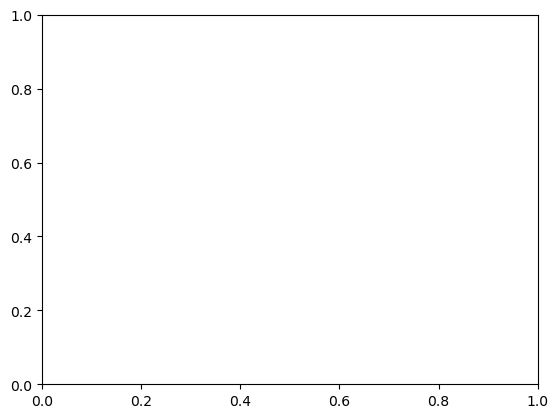

In [60]:

_, ax = plt.subplots(1, 1)
df[['y', 'autoarima_original']][300:].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)
